In [1]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

#%matplotlib inline
#%matplotlib notebook
plt.rcParams["figure.figsize"] = (10,6)
# import warnings
# warnings.filterwarnings("ignore")
# warnings.warn("this will not show")
pd.set_option('display.float_format', lambda x: '%.3f' % x)
#pd.options.display.float_format = '{:.3f}'.format

In [2]:
df = pd.read_csv("diabetes.csv") # Imbalanced data project.
df.head()

Pregnancies  Glucose  BloodPressure  SkinThickness  Insulin    BMI  \
0            6      148             72             35        0 33.600   
1            1       85             66             29        0 26.600   
2            8      183             64              0        0 23.300   
3            1       89             66             23       94 28.100   
4            0      137             40             35      168 43.100   

   DiabetesPedigreeFunction  Age  Outcome  
0                     0.627   50        1  
1                     0.351   31        0  
2                     0.672   32        1  
3                     0.167   21        0  
4                     2.288   33        1

In [3]:
df.shape

(768, 9)

## Exploratory Data Analysis and Visualization

In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 768 entries, 0 to 767
Data columns (total 9 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   Pregnancies               768 non-null    int64  
 1   Glucose                   768 non-null    int64  
 2   BloodPressure             768 non-null    int64  
 3   SkinThickness             768 non-null    int64  
 4   Insulin                   768 non-null    int64  
 5   BMI                       768 non-null    float64
 6   DiabetesPedigreeFunction  768 non-null    float64
 7   Age                       768 non-null    int64  
 8   Outcome                   768 non-null    int64  
dtypes: float64(2), int64(7)
memory usage: 54.1 KB


In [5]:
df.describe().T

count    mean     std    min    25%     50%  \
Pregnancies              768.000   3.845   3.370  0.000  1.000   3.000   
Glucose                  768.000 120.895  31.973  0.000 99.000 117.000   
BloodPressure            768.000  69.105  19.356  0.000 62.000  72.000   
SkinThickness            768.000  20.536  15.952  0.000  0.000  23.000   
Insulin                  768.000  79.799 115.244  0.000  0.000  30.500   
BMI                      768.000  31.993   7.884  0.000 27.300  32.000   
DiabetesPedigreeFunction 768.000   0.472   0.331  0.078  0.244   0.372   
Age                      768.000  33.241  11.760 21.000 24.000  29.000   
Outcome                  768.000   0.349   0.477  0.000  0.000   0.000   

                             75%     max  
Pregnancies                6.000  17.000  
Glucose                  140.250 199.000  
BloodPressure             80.000 122.000  
SkinThickness             32.000  99.000  
Insulin                  127.250 846.000  
BMI                       36.600  67.100  
DiabetesPedigreeFunction   0.626   2.420  
Age                       41.000  81.000  
Outcome                    1.000   1.000

In [6]:
df.Outcome.value_counts() # A little bit imbalanced.

0    500
1    268
Name: Outcome, dtype: int64

In [7]:
df.Outcome.value_counts(normalize = True)

0   0.651
1   0.349
Name: Outcome, dtype: float64

c:\Users\EmincanY\AppData\Local\Programs\Python\Python310\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


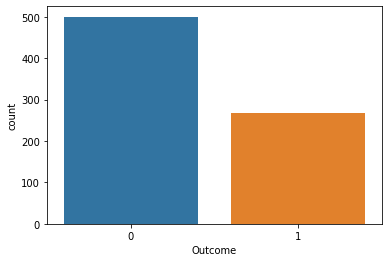

In [8]:
sns.countplot(df.Outcome)
plt.show()

c:\Users\EmincanY\AppData\Local\Programs\Python\Python310\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


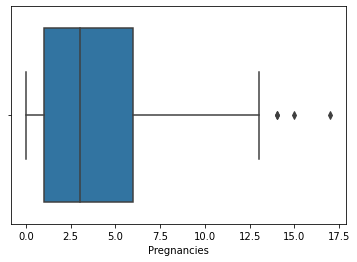

In [9]:
sns.boxplot(df.Pregnancies)
plt.show()

c:\Users\EmincanY\AppData\Local\Programs\Python\Python310\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


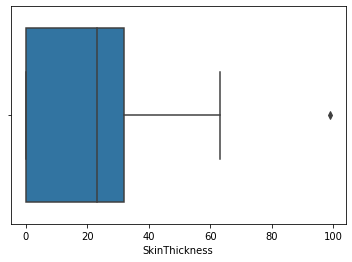

In [10]:
sns.boxplot(df.SkinThickness)
plt.show()

In [11]:
df=df[df.SkinThickness<70] # Impossible, wrong values.

c:\Users\EmincanY\AppData\Local\Programs\Python\Python310\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


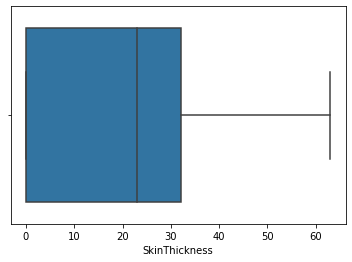

In [12]:
sns.boxplot(df.SkinThickness)
plt.show()

c:\Users\EmincanY\AppData\Local\Programs\Python\Python310\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


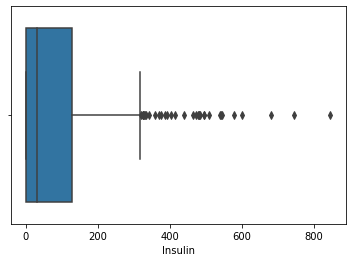

In [13]:
sns.boxplot(df.Insulin) # These values might be real. They might be outlier a little bit but I don't drop them first.
plt.show()

c:\Users\EmincanY\AppData\Local\Programs\Python\Python310\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


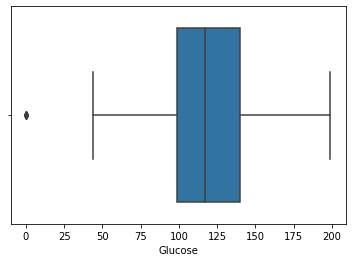

In [14]:
sns.boxplot(df.Glucose)
plt.show()

In [15]:
df[df.Glucose==0] # Wrong values

Pregnancies  Glucose  BloodPressure  SkinThickness  Insulin    BMI  \
75             1        0             48             20        0 24.700   
182            1        0             74             20       23 27.700   
342            1        0             68             35        0 32.000   
349            5        0             80             32        0 41.000   
502            6        0             68             41        0 39.000   

     DiabetesPedigreeFunction  Age  Outcome  
75                      0.140   22        0  
182                     0.299   21        0  
342                     0.389   22        0  
349                     0.346   37        1  
502                     0.727   41        1

In [16]:
df=df[df.Glucose>0] # We dropped Glucose == 0 observations (5 observations)

c:\Users\EmincanY\AppData\Local\Programs\Python\Python310\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


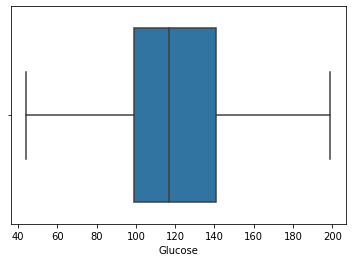

In [17]:
sns.boxplot(df.Glucose)
plt.show()

c:\Users\EmincanY\AppData\Local\Programs\Python\Python310\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


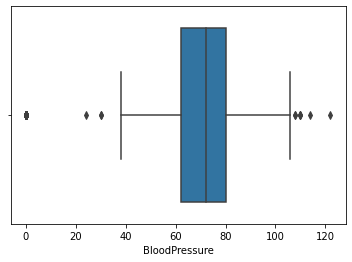

In [18]:
sns.boxplot(df.BloodPressure)
plt.show()

In [19]:
df=df[df.BloodPressure>35] # Also this is impossible too. BloodPressure must be more than 35 at least.

c:\Users\EmincanY\AppData\Local\Programs\Python\Python310\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


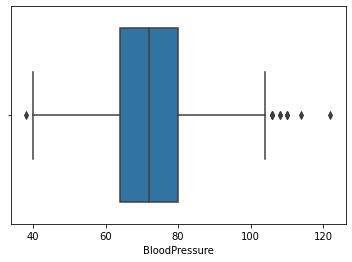

In [20]:
sns.boxplot(df.BloodPressure)
plt.show()

c:\Users\EmincanY\AppData\Local\Programs\Python\Python310\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


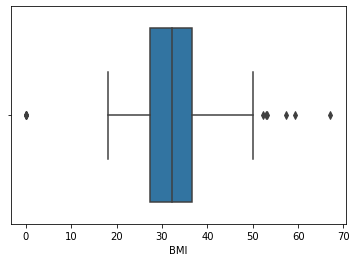

In [21]:
sns.boxplot(df.BMI)
plt.show()

In [22]:
df=df[df.BMI>0] # BMI cant be 0...

c:\Users\EmincanY\AppData\Local\Programs\Python\Python310\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


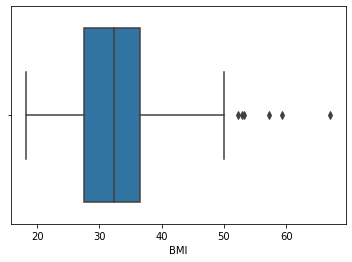

In [23]:
sns.boxplot(df.BMI)
plt.show()

In [24]:
df.shape

(720, 9)

In [25]:
df.Outcome.value_counts()

0    473
1    247
Name: Outcome, dtype: int64

In [26]:
# We clear our data a little bit

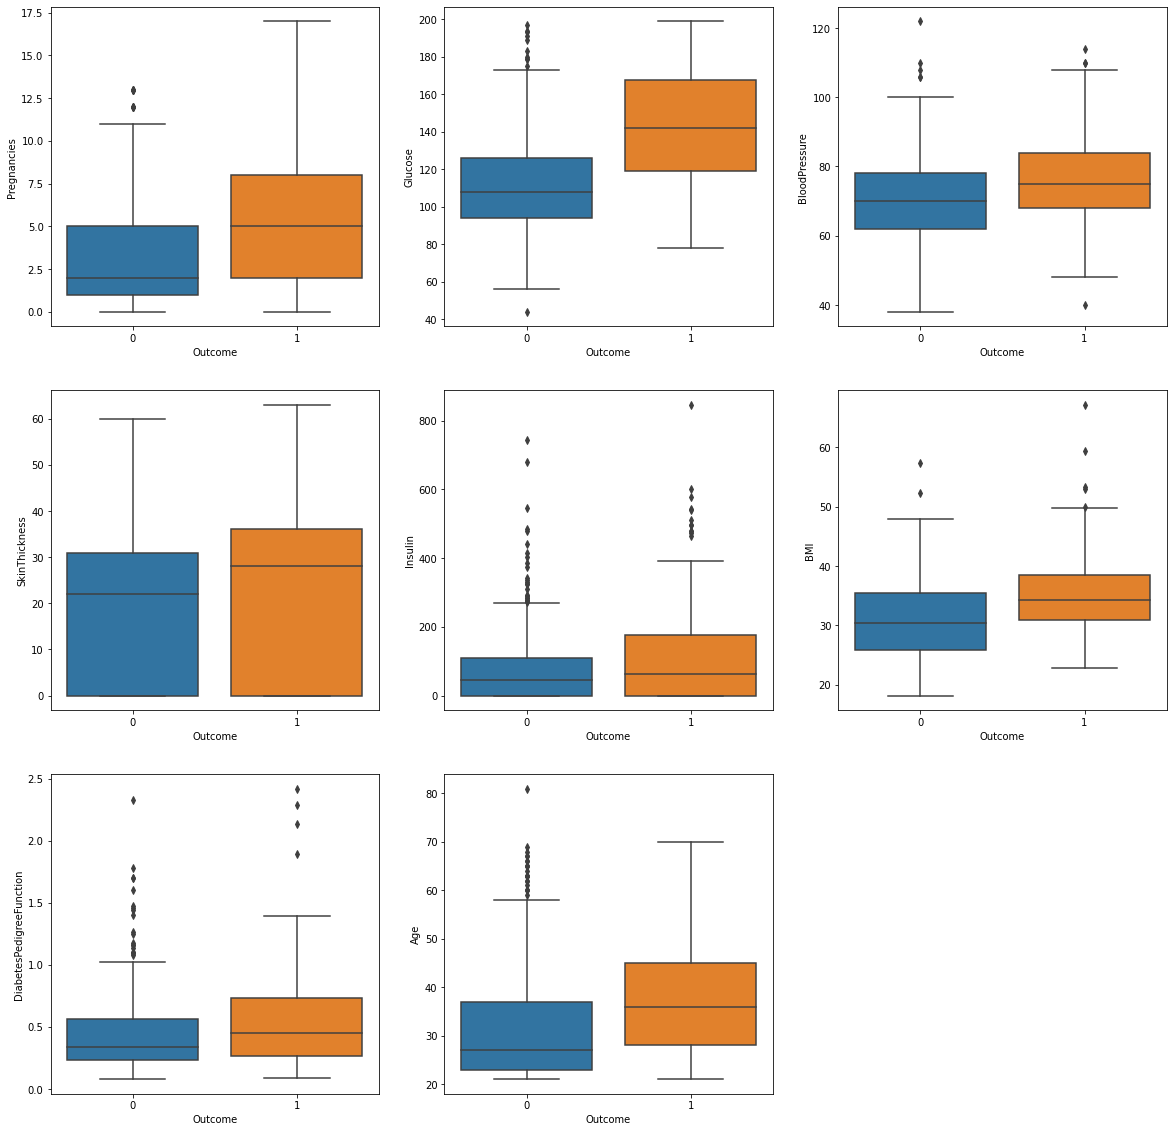

In [27]:
index = 0
plt.figure(figsize=(20,20))
for feature in df.columns:
    if feature != "Outcome":
        index += 1
        plt.subplot(3,3,index)
        sns.boxplot(x='Outcome',y=feature,data=df)
plt.show()

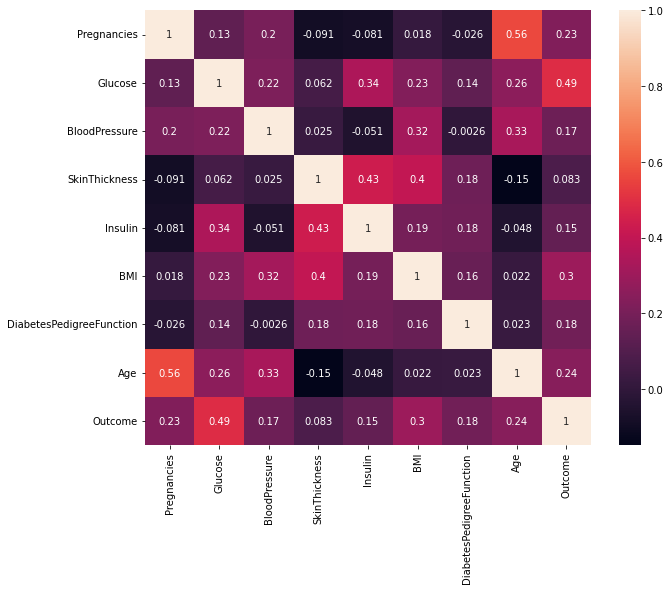

In [28]:
plt.figure(figsize=(10,8))
sns.heatmap(df.corr(), annot=True)
plt.show()

In [29]:
# Logistic Regression have Ridge and Lasso in the background.

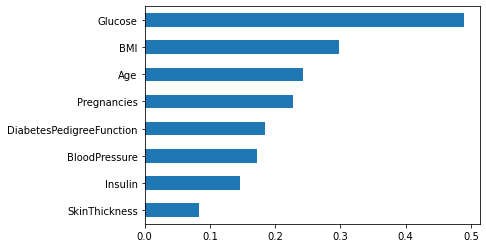

In [30]:
df.corr()["Outcome"].drop("Outcome").sort_values().plot.barh()
plt.show()

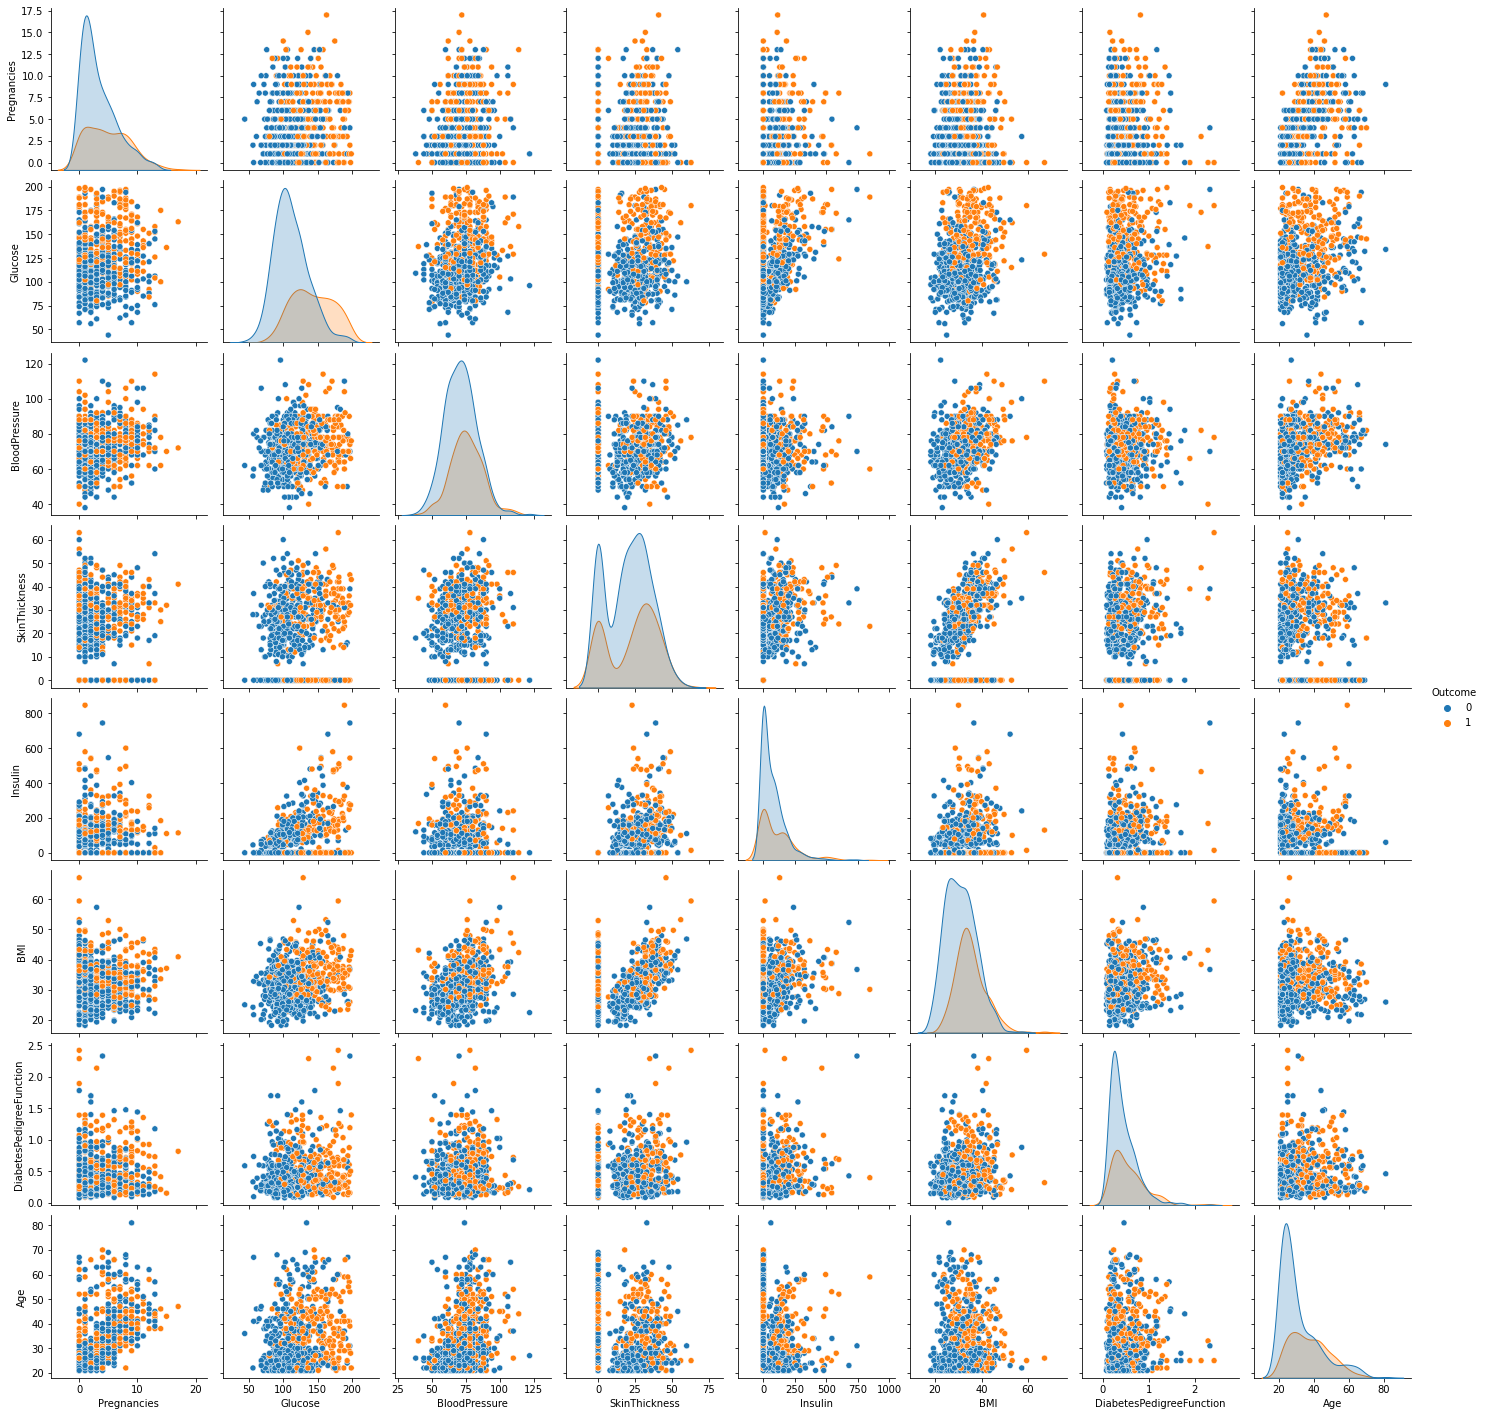

In [31]:
sns.pairplot(df, hue = "Outcome")
plt.show()

## Train | Test Split and Scaling

In [32]:
X=df.drop(["Outcome"], axis=1)
y=df["Outcome"]

In [33]:
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler

In [34]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.20, stratify=y, random_state=42) # We use stratify parameter because of imbalanced data.
# Stratify parameter will preserve the proportion of target as in original dataset, in the train and test datasets as well.
# Stratified Sampling : Tabakalı Örnekleme, evrenin alt gruplara ayrılabileceği durumlarda örnekleme hatasını azaltan bir örnekleme yöntemidir.

In [35]:
scaler = StandardScaler()

In [36]:
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

## Modelling

In [37]:
from sklearn.linear_model import LogisticRegression

In [38]:
log_model=LogisticRegression()

In [39]:
log_model.fit(X_train_scaled, y_train)

LogisticRegression()

In [40]:
y_pred=log_model.predict(X_test_scaled)

In [41]:
y_pred_proba = log_model.predict_proba(X_test_scaled)

In [42]:
test_data = pd.concat([X_test, y_test], axis=1)
test_data["pred"] = y_pred
test_data["pred_proba"] = y_pred_proba[:,1] # Probability of 1
test_data.sample(10)

Pregnancies  Glucose  BloodPressure  SkinThickness  Insulin    BMI  \
469            6      154             78             41      140 46.100   
324            2      112             75             32        0 35.700   
702            1      168             88             29        0 35.000   
605            1      124             60             32        0 35.800   
90             1       80             55              0        0 19.100   
433            2      139             75              0        0 25.600   
257            2      114             68             22        0 28.700   
542           10       90             85             32        0 34.900   
282            7      133             88             15      155 32.400   
624            2      108             64              0        0 30.800   

     DiabetesPedigreeFunction  Age  Outcome  pred  pred_proba  
469                     0.571   27        0     1       0.861  
324                     0.148   21        0     0       0.190  
702                     0.905   52        1     1       0.753  
605                     0.514   21        0     0       0.349  
90                      0.258   21        0     0       0.018  
433                     0.167   29        0     0       0.198  
257                     0.092   25        0     0       0.119  
542                     0.825   56        1     0       0.381  
282                     0.262   37        0     0       0.376  
624                     0.158   21        0     0       0.125

## Model Performance on Classification Tasks

In [43]:
from sklearn.metrics import confusion_matrix, classification_report

In [44]:
def eval_metric(model, X_train, y_train, X_test, y_test):
    y_train_pred = model.predict(X_train)
    y_pred = model.predict(X_test)
    
    print("Test_Set")
    print(confusion_matrix(y_test, y_pred))
    print(classification_report(y_test, y_pred))
    print()
    print("Train_Set")
    print(confusion_matrix(y_train, y_train_pred))
    print(classification_report(y_train, y_train_pred))

In [45]:
eval_metric(log_model, X_train_scaled, y_train, X_test_scaled, y_test)

Test_Set
[[85 10]
 [20 29]]
              precision    recall  f1-score   support

           0       0.81      0.89      0.85        95
           1       0.74      0.59      0.66        49

    accuracy                           0.79       144
   macro avg       0.78      0.74      0.75       144
weighted avg       0.79      0.79      0.79       144


Train_Set
[[337  41]
 [ 89 109]]
              precision    recall  f1-score   support

           0       0.79      0.89      0.84       378
           1       0.73      0.55      0.63       198

    accuracy                           0.77       576
   macro avg       0.76      0.72      0.73       576
weighted avg       0.77      0.77      0.77       576



## Cross Validate

In [46]:
from sklearn.model_selection import cross_validate

In [47]:
model = LogisticRegression()

scores = cross_validate(model, X_train_scaled, y_train, scoring = ['precision','recall','f1','accuracy'], cv = 10)
# scores
df_scores = pd.DataFrame(scores, index = range(1, 11))
df_scores


fit_time  score_time  test_precision  test_recall  test_f1  test_accuracy
1      0.005       0.005           0.600        0.450    0.514          0.707
2      0.006       0.004           0.643        0.450    0.529          0.724
3      0.003       0.002           0.923        0.600    0.727          0.845
4      0.004       0.002           0.857        0.600    0.706          0.828
5      0.003       0.002           0.706        0.600    0.649          0.776
6      0.002       0.002           0.647        0.550    0.595          0.741
7      0.002       0.002           0.714        0.526    0.606          0.772
8      0.002       0.002           0.647        0.579    0.611          0.754
9      0.003       0.002           0.733        0.550    0.629          0.772
10     0.002       0.002           0.625        0.500    0.556          0.719

In [48]:
df_scores.mean()[2:]

test_precision   0.710
test_recall      0.541
test_f1          0.612
test_accuracy    0.764
dtype: float64

In [49]:
eval_metric(log_model, X_train_scaled, y_train, X_test_scaled, y_test)

Test_Set
[[85 10]
 [20 29]]
              precision    recall  f1-score   support

           0       0.81      0.89      0.85        95
           1       0.74      0.59      0.66        49

    accuracy                           0.79       144
   macro avg       0.78      0.74      0.75       144
weighted avg       0.79      0.79      0.79       144


Train_Set
[[337  41]
 [ 89 109]]
              precision    recall  f1-score   support

           0       0.79      0.89      0.84       378
           1       0.73      0.55      0.63       198

    accuracy                           0.77       576
   macro avg       0.76      0.72      0.73       576
weighted avg       0.77      0.77      0.77       576



## Cross Validate for 0 class

In [50]:
import sklearn
sklearn.metrics.SCORERS.keys()

dict_keys(['explained_variance', 'r2', 'max_error', 'matthews_corrcoef', 'neg_median_absolute_error', 'neg_mean_absolute_error', 'neg_mean_absolute_percentage_error', 'neg_mean_squared_error', 'neg_mean_squared_log_error', 'neg_root_mean_squared_error', 'neg_mean_poisson_deviance', 'neg_mean_gamma_deviance', 'accuracy', 'top_k_accuracy', 'roc_auc', 'roc_auc_ovr', 'roc_auc_ovo', 'roc_auc_ovr_weighted', 'roc_auc_ovo_weighted', 'balanced_accuracy', 'average_precision', 'neg_log_loss', 'neg_brier_score', 'adjusted_rand_score', 'rand_score', 'homogeneity_score', 'completeness_score', 'v_measure_score', 'mutual_info_score', 'adjusted_mutual_info_score', 'normalized_mutual_info_score', 'fowlkes_mallows_score', 'precision', 'precision_macro', 'precision_micro', 'precision_samples', 'precision_weighted', 'recall', 'recall_macro', 'recall_micro', 'recall_samples', 'recall_weighted', 'f1', 'f1_macro', 'f1_micro', 'f1_samples', 'f1_weighted', 'jaccard', 'jaccard_macro', 'jaccard_micro', 'jaccard_s

In [51]:
from sklearn.metrics import make_scorer
from sklearn.metrics import precision_score, recall_score, accuracy_score, f1_score

f1_0 = make_scorer(f1_score, pos_label =0)
precision_0 = make_scorer(precision_score, pos_label =0)
recall_0 = make_scorer(recall_score, pos_label =0)

In [52]:
model = LogisticRegression()

scores = cross_validate(model, X_train_scaled, y_train,scoring = {"precision_0":precision_0, "recall_0":recall_0, "f1_0":f1_0}, 
                        cv = 10)
df_scores = pd.DataFrame(scores, index = range(1, 11))
df_scores

fit_time  score_time  test_precision_0  test_recall_0  test_f1_0
1      0.003       0.002             0.744          0.842      0.790
2      0.003       0.002             0.750          0.868      0.805
3      0.002       0.003             0.822          0.974      0.892
4      0.003       0.003             0.818          0.947      0.878
5      0.004       0.002             0.805          0.868      0.835
6      0.004       0.003             0.780          0.842      0.810
7      0.003       0.004             0.791          0.895      0.840
8      0.003       0.003             0.800          0.842      0.821
9      0.003       0.006             0.786          0.892      0.835
10     0.004       0.004             0.756          0.838      0.795

In [53]:
df_scores.mean()[2:]

test_precision_0   0.785
test_recall_0      0.881
test_f1_0          0.830
dtype: float64

In [54]:
eval_metric(log_model, X_train_scaled, y_train, X_test_scaled, y_test)

Test_Set
[[85 10]
 [20 29]]
              precision    recall  f1-score   support

           0       0.81      0.89      0.85        95
           1       0.74      0.59      0.66        49

    accuracy                           0.79       144
   macro avg       0.78      0.74      0.75       144
weighted avg       0.79      0.79      0.79       144


Train_Set
[[337  41]
 [ 89 109]]
              precision    recall  f1-score   support

           0       0.79      0.89      0.84       378
           1       0.73      0.55      0.63       198

    accuracy                           0.77       576
   macro avg       0.76      0.72      0.73       576
weighted avg       0.77      0.77      0.77       576



## GridSearchCV

In [55]:
import sklearn
sklearn.metrics.SCORERS.keys()

dict_keys(['explained_variance', 'r2', 'max_error', 'matthews_corrcoef', 'neg_median_absolute_error', 'neg_mean_absolute_error', 'neg_mean_absolute_percentage_error', 'neg_mean_squared_error', 'neg_mean_squared_log_error', 'neg_root_mean_squared_error', 'neg_mean_poisson_deviance', 'neg_mean_gamma_deviance', 'accuracy', 'top_k_accuracy', 'roc_auc', 'roc_auc_ovr', 'roc_auc_ovo', 'roc_auc_ovr_weighted', 'roc_auc_ovo_weighted', 'balanced_accuracy', 'average_precision', 'neg_log_loss', 'neg_brier_score', 'adjusted_rand_score', 'rand_score', 'homogeneity_score', 'completeness_score', 'v_measure_score', 'mutual_info_score', 'adjusted_mutual_info_score', 'normalized_mutual_info_score', 'fowlkes_mallows_score', 'precision', 'precision_macro', 'precision_micro', 'precision_samples', 'precision_weighted', 'recall', 'recall_macro', 'recall_micro', 'recall_samples', 'recall_weighted', 'f1', 'f1_macro', 'f1_micro', 'f1_samples', 'f1_weighted', 'jaccard', 'jaccard_macro', 'jaccard_micro', 'jaccard_s

In [56]:
# Subsequently, the scikit-learn library version of SVC can be set up with a large number of hyperparameters, some of the common parameters are:
# C: This is a regularisation parameter
# Kernel: We can set the kernel parameter to linear, poly, rbf, sigmoid, precomputed or provide our own callable.
# Degree: We can pass in a custom degree to support the poly kernel parameter.
# Gamma: This is the coefficient for rbf, poly and sigmoid kernel parameter.
# Max_Iter: It is the maximum number of iterations for the solver.

In [57]:
from sklearn.model_selection import GridSearchCV

model = LogisticRegression()

penalty = ["l1", "l2"]
C = np.logspace(-1, 5, 20) 
class_weight= ["balanced", None] 

solver = ["lbfgs", "liblinear", "sag", "saga"] 

param_grid = {"penalty" : penalty,
              "C" : C,
              "class_weight":class_weight,
              "solver":solver}


grid_model = GridSearchCV(estimator=model,
                          param_grid=param_grid,
                          cv=10,
                          scoring = "recall", 
                          n_jobs = -1)

In [58]:
grid_model.fit(X_train_scaled,y_train)

c:\Users\EmincanY\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\model_selection\_validation.py:378: FitFailedWarning: 
800 fits failed out of a total of 3200.
The score on these train-test partitions for these parameters will be set to nan.
If these failures are not expected, you can try to debug them by setting error_score='raise'.

Below are more details about the failures:
--------------------------------------------------------------------------------
400 fits failed with the following error:
Traceback (most recent call last):
  File "c:\Users\EmincanY\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\model_selection\_validation.py", line 686, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "c:\Users\EmincanY\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\linear_model\_logistic.py", line 1091, in fit
    solver = _check_solver(self.solver, self.penalty, self.dual)
  File "c:\Users\EmincanY\AppData\Loc

GridSearchCV(cv=10, estimator=LogisticRegression(), n_jobs=-1,
             param_grid={'C': array([1.00000000e-01, 2.06913808e-01, 4.28133240e-01, 8.85866790e-01,
       1.83298071e+00, 3.79269019e+00, 7.84759970e+00, 1.62377674e+01,
       3.35981829e+01, 6.95192796e+01, 1.43844989e+02, 2.97635144e+02,
       6.15848211e+02, 1.27427499e+03, 2.63665090e+03, 5.45559478e+03,
       1.12883789e+04, 2.33572147e+04, 4.83293024e+04, 1.00000000e+05]),
                         'class_weight': ['balanced', None],
                         'penalty': ['l1', 'l2'],
                         'solver': ['lbfgs', 'liblinear', 'sag', 'saga']},
             scoring='recall')

In [59]:
grid_model.best_params_

{'C': 0.1, 'class_weight': 'balanced', 'penalty': 'l1', 'solver': 'liblinear'}

In [60]:
eval_metric(grid_model, X_train_scaled, y_train, X_test_scaled, y_test)

Test_Set
[[76 19]
 [13 36]]
              precision    recall  f1-score   support

           0       0.85      0.80      0.83        95
           1       0.65      0.73      0.69        49

    accuracy                           0.78       144
   macro avg       0.75      0.77      0.76       144
weighted avg       0.79      0.78      0.78       144


Train_Set
[[288  90]
 [ 49 149]]
              precision    recall  f1-score   support

           0       0.85      0.76      0.81       378
           1       0.62      0.75      0.68       198

    accuracy                           0.76       576
   macro avg       0.74      0.76      0.74       576
weighted avg       0.78      0.76      0.76       576



## ROC (Receiver Operating Curve) and AUC (Area Under Curve)

https://towardsdatascience.com/calculating-and-setting-thresholds-to-optimise-logistic-regression-performance-c77e6d112d7e

In [61]:
from sklearn.metrics import plot_roc_curve, plot_precision_recall_curve, roc_auc_score, auc, roc_curve, average_precision_score, precision_recall_curve

c:\Users\EmincanY\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\utils\deprecation.py:87: FutureWarning: Function plot_roc_curve is deprecated; Function :func:`plot_roc_curve` is deprecated in 1.0 and will be removed in 1.2. Use one of the class methods: :meth:`sklearn.metrics.RocCurveDisplay.from_predictions` or :meth:`sklearn.metrics.RocCurveDisplay.from_estimator`.
  warnings.warn(msg, category=FutureWarning)


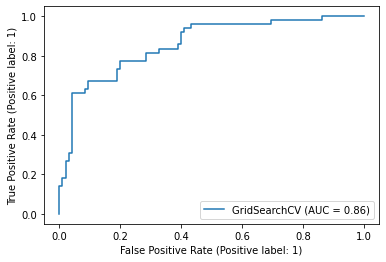

In [62]:
plot_roc_curve(grid_model, X_test_scaled, y_test); # For balance datas.
plt.show()

c:\Users\EmincanY\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\utils\deprecation.py:87: FutureWarning: Function plot_precision_recall_curve is deprecated; Function `plot_precision_recall_curve` is deprecated in 1.0 and will be removed in 1.2. Use one of the class methods: PrecisionRecallDisplay.from_predictions or PrecisionRecallDisplay.from_estimator.
  warnings.warn(msg, category=FutureWarning)


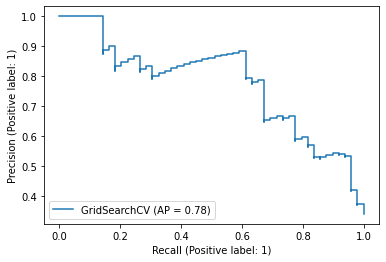

In [63]:
plot_precision_recall_curve(grid_model, X_test_scaled, y_test); # For imbalance datas.
plt.show()

https://paulvanderlaken.com/?s=roc+auc

## Finding Best Threshold for max recall score

c:\Users\EmincanY\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\utils\deprecation.py:87: FutureWarning: Function plot_roc_curve is deprecated; Function :func:`plot_roc_curve` is deprecated in 1.0 and will be removed in 1.2. Use one of the class methods: :meth:`sklearn.metrics.RocCurveDisplay.from_predictions` or :meth:`sklearn.metrics.RocCurveDisplay.from_estimator`.
  warnings.warn(msg, category=FutureWarning)


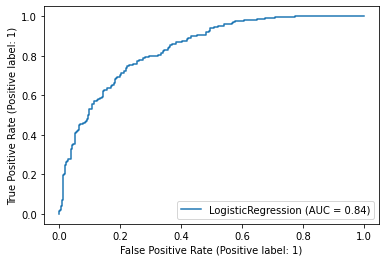

In [64]:
plot_roc_curve(log_model, X_train_scaled, y_train);  
plt.show()

In [67]:
y_pred_proba = log_model.predict_proba(X_train_scaled)
roc_auc_score(y_train, y_pred_proba[:,1])


0.8378493934049489

In [71]:
fp_rate, tp_rate, thresholds = roc_curve(y_train, y_pred_proba[:,1])

In [75]:
fp_tp_th = fp_rate, tp_rate, thresholds = roc_curve(y_train, y_pred_proba[:,1])
df_fp_tp_th = pd.DataFrame(fp_tp_th)
df_fp_tp_th

0     1     2     3     4     5     6     7     8     9    ...   160  \
0 0.000 0.000 0.000 0.003 0.003 0.005 0.005 0.008 0.008 0.011  ... 0.606   
1 0.000 0.005 0.015 0.015 0.020 0.020 0.040 0.040 0.071 0.071  ... 0.980   
2 1.994 0.994 0.967 0.964 0.957 0.954 0.943 0.940 0.905 0.905  ... 0.123   

    161   162   163   164   165   166   167   168   169  
0 0.648 0.648 0.675 0.675 0.709 0.709 0.775 0.775 1.000  
1 0.980 0.985 0.985 0.990 0.990 0.995 0.995 1.000 1.000  
2 0.113 0.113 0.105 0.105 0.096 0.095 0.081 0.081 0.013  

[3 rows x 170 columns]

![](2022-09-28-08-32-00.png)

In [77]:
optimal_idx = np.argmax(tp_rate - fp_rate)
optimal_threshold = thresholds[optimal_idx]
optimal_threshold

# Important finding optimal threshold for max recall score

0.3393818488757875

In [78]:
y_pred_proba = log_model.predict_proba(X_train_scaled)
average_precision_score(y_train, y_pred_proba[:,1])

0.7120696300524079

In [79]:
precisions, recalls, thresholds = precision_recall_curve(y_train, y_pred_proba[:,1])

In [81]:
optimal_idx = np.argmax((2 * precisions * recalls) / (precisions + recalls))
optimal_threshold = thresholds[optimal_idx]
optimal_threshold

# Optimal threshold for max f1 score.

0.3393818488757875

In [80]:
grid_model.predict_proba(X_test_scaled)[:,1]

array([0.86113697, 0.91895215, 0.54015497, 0.3283417 , 0.84586317,
       0.1902062 , 0.37229669, 0.89304422, 0.09179684, 0.23758021,
       0.4221817 , 0.40052515, 0.32152255, 0.29622805, 0.91147267,
       0.04581213, 0.31483742, 0.77838264, 0.60683496, 0.17501535,
       0.59127017, 0.07183501, 0.8561973 , 0.26772585, 0.35899686,
       0.4266362 , 0.21360346, 0.54007287, 0.47724505, 0.26626231,
       0.32223251, 0.47415525, 0.5996926 , 0.2960595 , 0.92993606,
       0.1640761 , 0.56706738, 0.37506766, 0.66446425, 0.17883737,
       0.22572637, 0.10909207, 0.11562695, 0.76815591, 0.45681514,
       0.48417583, 0.45124874, 0.8419851 , 0.89861157, 0.48442663,
       0.31847819, 0.22797658, 0.45358343, 0.0612822 , 0.08593756,
       0.8789641 , 0.65055914, 0.21426625, 0.72030056, 0.53913164,
       0.81872911, 0.6213439 , 0.7600461 , 0.91815992, 0.84383064,
       0.17311444, 0.33797115, 0.36854043, 0.96338335, 0.10317697,
       0.50366905, 0.22026535, 0.76705963, 0.24150791, 0.65058

In [82]:
y_pred2 = pd.Series(grid_model.predict_proba(X_test_scaled)[:,1]).apply(lambda x : 1 if x >= optimal_threshold else 0)

In [83]:
print(confusion_matrix(y_test,y_pred2))
print(classification_report(y_test,y_pred2))

[[55 40]
 [ 3 46]]
              precision    recall  f1-score   support

           0       0.95      0.58      0.72        95
           1       0.53      0.94      0.68        49

    accuracy                           0.70       144
   macro avg       0.74      0.76      0.70       144
weighted avg       0.81      0.70      0.71       144



In [84]:
y_train_pred2 = pd.Series(grid_model.predict_proba(X_train_scaled)[:,1]).apply(lambda x : 1 if x >= optimal_threshold else 0)
print(confusion_matrix(y_train, y_train_pred2))
print(classification_report(y_train, y_train_pred2))

[[196 182]
 [ 16 182]]
              precision    recall  f1-score   support

           0       0.92      0.52      0.66       378
           1       0.50      0.92      0.65       198

    accuracy                           0.66       576
   macro avg       0.71      0.72      0.66       576
weighted avg       0.78      0.66      0.66       576



In [85]:
from sklearn.model_selection import StratifiedKFold

def CV(n, est, X, y, optimal_threshold):
    skf = StratifiedKFold(n_splits = n, shuffle = True, random_state = 42)
    acc_scores = []
    pre_scores = []
    rec_scores = []
    f1_scores  = []
    
    X = X.reset_index(drop=True)
    y = y.reset_index(drop=True)
    
    for train_index, test_index in skf.split(X, y):
        
        X_train = X.loc[train_index]
        y_train = y.loc[train_index]
        X_test = X.loc[test_index]
        y_test = y.loc[test_index]
        
        
        est = est
        est.fit(X_train, y_train)
        y_pred = est.predict(X_test)
        y_pred_proba = est.predict_proba(X_test)
             
        y_pred2 = pd.Series(y_pred_proba[:,1]).apply(lambda x : 1 if x >= optimal_threshold else 0)
        
        acc_scores.append(accuracy_score(y_test, y_pred2))
        pre_scores.append(precision_score(y_test, y_pred2, pos_label=1))
        rec_scores.append(recall_score(y_test, y_pred2, pos_label=1))
        f1_scores.append(f1_score(y_test, y_pred2, pos_label=1))
    
    print(f'Accuracy {np.mean(acc_scores)*100:>10,.2f}%  std {np.std(acc_scores)*100:.2f}%')
    print(f'Precision-1 {np.mean(pre_scores)*100:>7,.2f}%  std {np.std(pre_scores)*100:.2f}%')
    print(f'Recall-1 {np.mean(rec_scores)*100:>10,.2f}%  std {np.std(rec_scores)*100:.2f}%')
    print(f'F1_score-1 {np.mean(f1_scores)*100:>8,.2f}%  std {np.std(f1_scores)*100:.2f}%')

In [86]:
model = LogisticRegression(C= 0.1, class_weight= 'balanced',penalty= 'l1',solver= 'liblinear')
CV(10, model, pd.DataFrame(X_train_scaled), y_train, optimal_threshold)

Accuracy      64.76%  std 5.47%
Precision-1   49.86%  std 4.68%
Recall-1      91.45%  std 5.95%
F1_score-1    64.25%  std 3.31%


In [ ]:
skf = StratifiedKFold(n_splits = 10, shuffle = True, random_state = 42)
for train_index, test_index in skf.split(X, y):
    print(train_index, test_index)

## Finding Best Threshold for the most balanced score between recall and precision

c:\Users\EmincanY\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\utils\deprecation.py:87: FutureWarning: Function plot_roc_curve is deprecated; Function :func:`plot_roc_curve` is deprecated in 1.0 and will be removed in 1.2. Use one of the class methods: :meth:`sklearn.metrics.RocCurveDisplay.from_predictions` or :meth:`sklearn.metrics.RocCurveDisplay.from_estimator`.
  warnings.warn(msg, category=FutureWarning)


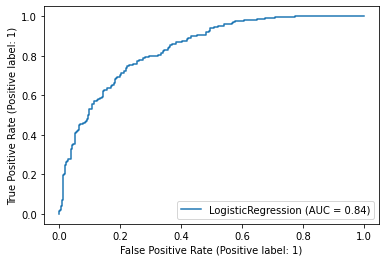

In [88]:
plot_roc_curve(log_model, X_train_scaled, y_train);
plt.show()

In [89]:
y_pred_proba = log_model.predict_proba(X_train_scaled)
average_precision_score(y_train, y_pred_proba[:,1])

0.7120696300524079

In [90]:
fp_rate, tp_rate, thresholds = roc_curve(y_train, y_pred_proba[:,1])

optimal_idx = np.argmax(tp_rate - fp_rate)
optimal_threshold = thresholds[optimal_idx]
optimal_threshold

0.3393818488757875

In [91]:
y_pred2 = pd.Series(grid_model.predict_proba(X_test_scaled)[:,1]).apply(lambda x : 1 if x >= optimal_threshold else 0) 

In [92]:
print(confusion_matrix(y_test,y_pred2))
print(classification_report(y_test,y_pred2))

[[55 40]
 [ 3 46]]
              precision    recall  f1-score   support

           0       0.95      0.58      0.72        95
           1       0.53      0.94      0.68        49

    accuracy                           0.70       144
   macro avg       0.74      0.76      0.70       144
weighted avg       0.81      0.70      0.71       144



In [93]:
y_train_pred2 = pd.Series(grid_model.predict_proba(X_train_scaled)[:,1]).apply(lambda x : 1 if x >= optimal_threshold else 0)
print(confusion_matrix(y_train, y_train_pred2))
print(classification_report(y_train, y_train_pred2))

[[196 182]
 [ 16 182]]
              precision    recall  f1-score   support

           0       0.92      0.52      0.66       378
           1       0.50      0.92      0.65       198

    accuracy                           0.66       576
   macro avg       0.71      0.72      0.66       576
weighted avg       0.78      0.66      0.66       576



In [94]:
def CV(n, est, X, y, optimal_threshold):
    skf = StratifiedKFold(n_splits = n, shuffle = True, random_state = 42)
    acc_scores = []
    pre_scores = []
    rec_scores = []
    f1_scores  = []
    
    X = X.reset_index(drop=True)
    y = y.reset_index(drop=True)
    
    for train_index, test_index in skf.split(X, y):
        
        X_train = X.loc[train_index]
        y_train = y.loc[train_index]
        X_test = X.loc[test_index]
        y_test = y.loc[test_index]
        
        
        est = est
        est.fit(X_train, y_train)
        y_pred = est.predict(X_test)
        y_pred_proba = est.predict_proba(X_test)
             
        y_pred2 = pd.Series(y_pred_proba[:,1]).apply(lambda x : 1 if x >= optimal_threshold else 0)
        
        acc_scores.append(accuracy_score(y_test, y_pred2))
        pre_scores.append(precision_score(y_test, y_pred2, pos_label=1))
        rec_scores.append(recall_score(y_test, y_pred2, pos_label=1))
        f1_scores.append(f1_score(y_test, y_pred2, pos_label=1))
    
    print(f'Accuracy {np.mean(acc_scores)*100:>10,.2f}%  std {np.std(acc_scores)*100:.2f}%')
    print(f'Precision-1 {np.mean(pre_scores)*100:>7,.2f}%  std {np.std(pre_scores)*100:.2f}%')
    print(f'Recall-1 {np.mean(rec_scores)*100:>10,.2f}%  std {np.std(rec_scores)*100:.2f}%')
    print(f'F1_score-1 {np.mean(f1_scores)*100:>8,.2f}%  std {np.std(f1_scores)*100:.2f}%')


In [95]:
model = LogisticRegression(C= 0.1, class_weight= 'balanced',penalty= 'l1',solver= 'liblinear')
CV(10, model, pd.DataFrame(X_train_scaled), y_train, optimal_threshold)

Accuracy      64.76%  std 5.47%
Precision-1   49.86%  std 4.68%
Recall-1      91.45%  std 5.95%
F1_score-1    64.25%  std 3.31%


## Final Model and Deployment

In [96]:
scaler = StandardScaler().fit(X)

In [98]:
import joblib

scaler_filename = 'Scaler'
joblib.dump(scaler , scaler_filename)

['Scaler']

In [99]:
X_scaled = scaler.transform(X)

In [100]:
final_model = LogisticRegression(class_weight = "balanced").fit(X_scaled, y)

In [101]:
model_filename = 'Lr_Model'
joblib.dump(final_model , model_filename)

['Lr_Model']

In [102]:
X.describe().T

count    mean     std    min     25%     50%  \
Pregnancies              720.000   3.881   3.366  0.000   1.000   3.000   
Glucose                  720.000 121.897  30.649 44.000 100.000 117.000   
BloodPressure            720.000  72.589  12.075 38.000  64.000  72.000   
SkinThickness            720.000  21.288  15.477  0.000   0.000  24.000   
Insulin                  720.000  84.676 117.277  0.000   0.000  48.000   
BMI                      720.000  32.424   6.842 18.200  27.475  32.350   
DiabetesPedigreeFunction 720.000   0.475   0.333  0.078   0.245   0.378   
Age                      720.000  33.339  11.737 21.000  24.000  29.000   

                             75%     max  
Pregnancies                6.000  17.000  
Glucose                  142.000 199.000  
BloodPressure             80.000 122.000  
SkinThickness             33.000  63.000  
Insulin                  132.000 846.000  
BMI                       36.600  67.100  
DiabetesPedigreeFunction   0.629   2.420  
Age                       41.000  81.000

In [103]:
my_test_dict = {"Pregnancies": [3, 6, 5],
           "Glucose": [117, 140, 120],
           "BloodPressure": [72, 80, 75],
           "SkinThickness": [23, 33, 25],
           "Insulin": [48, 132, 55],
           "BMI": [32, 36.5, 34],
           "DiabetesPedigreeFunction": [0.38, 0.63, 0.45],
           "Age": [29, 40, 33]
          }

In [104]:
sample = pd.DataFrame(my_test_dict)
sample

Pregnancies  Glucose  BloodPressure  SkinThickness  Insulin    BMI  \
0            3      117             72             23       48 32.000   
1            6      140             80             33      132 36.500   
2            5      120             75             25       55 34.000   

   DiabetesPedigreeFunction  Age  
0                     0.380   29  
1                     0.630   40  
2                     0.450   33

In [105]:
scaler_diabates = joblib.load('Scaler')

sample_scaled = scaler_diabates.transform(sample)
sample_scaled

array([[-0.26176089, -0.15989353, -0.04880222,  0.1107269 , -0.3129508 ,
        -0.06203757, -0.28511694, -0.3699221 ],
       [ 0.63004277,  0.59105285,  0.61417137,  0.75730737,  0.40380099,
         0.59612131,  0.46610236,  0.56790858],
       [ 0.33277488, -0.06194401,  0.19981287,  0.240043  , -0.25322148,
         0.23047749, -0.07477553, -0.02889276]])

In [106]:
final_model = joblib.load('Lr_Model')

preds = final_model.predict(sample_scaled)
preds_proba = final_model.predict_proba(sample_scaled)
preds2 = [1 if i >= optimal_threshold else 0 for i in preds_proba[:,1]]

In [107]:
sample["pred_proba"] = preds_proba[:,1]
sample["pred_0.50"] = preds
sample["pred_0.34"] = preds2
sample

# 1 sample different because of different thresholds.

Pregnancies  Glucose  BloodPressure  SkinThickness  Insulin    BMI  \
0            3      117             72             23       48 32.000   
1            6      140             80             33      132 36.500   
2            5      120             75             25       55 34.000   

   DiabetesPedigreeFunction  Age  pred_proba  pred_0.50  pred_0.34  
0                     0.380   29       0.327          0          0  
1                     0.630   40       0.772          1          1  
2                     0.450   33       0.481          0          1

In [ ]:
# Done